## Task 1 : IRIS FLOWER CLASSIFICATION

#### Importing all the libraries which are needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")                         # Disable warnings
%matplotlib inline


In [2]:
# Load the dataset
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Display the first few rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.shape

(150, 6)

### EDA

In [6]:
# basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Droping the Index column as it is not needed
df.drop('Id', axis=1, inplace=True)

In [8]:
# Distribution of the class Species
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Preprocession the dataset

In [9]:
# checking on missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

#### Finding the statistical distribution of the data to find how they are related.

In [11]:
# Statistical Analysis
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Exploratory Data Analysis

Text(0.5, 1.0, 'Sepal Length Vs Sepal Width')

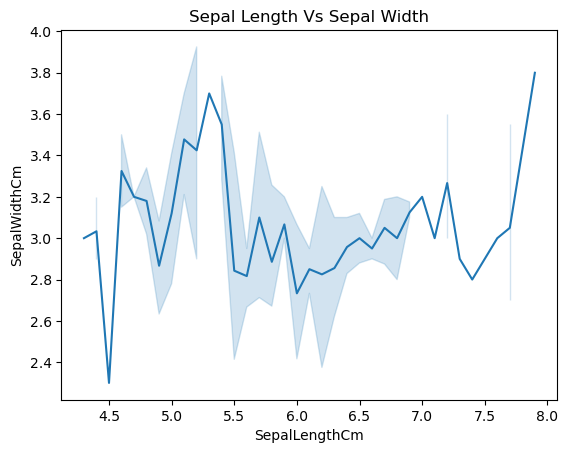

In [12]:
sns.lineplot(x="SepalLengthCm", y="SepalWidthCm", data=df)

  
# setting the title using Matplotlib
plt.title('Sepal Length Vs Sepal Width')

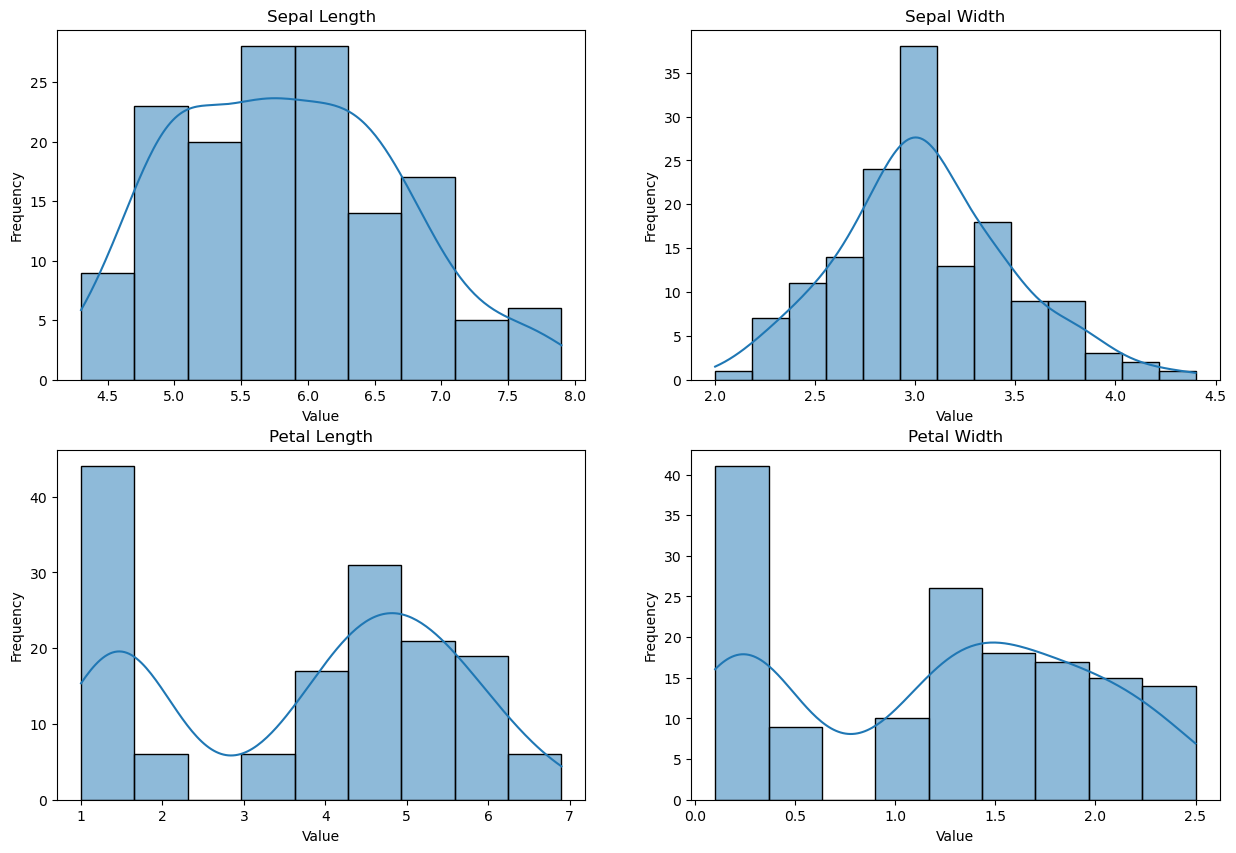

In [13]:
# Visualize the distribution of each single variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.histplot(data=df, x='SepalLengthCm', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length')

sns.histplot(data=df, x='SepalWidthCm', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width')

sns.histplot(data=df, x='PetalLengthCm', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Petal Length')

sns.histplot(data=df, x='PetalWidthCm', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Petal Width')
for ax in axes.flat:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.show()
     

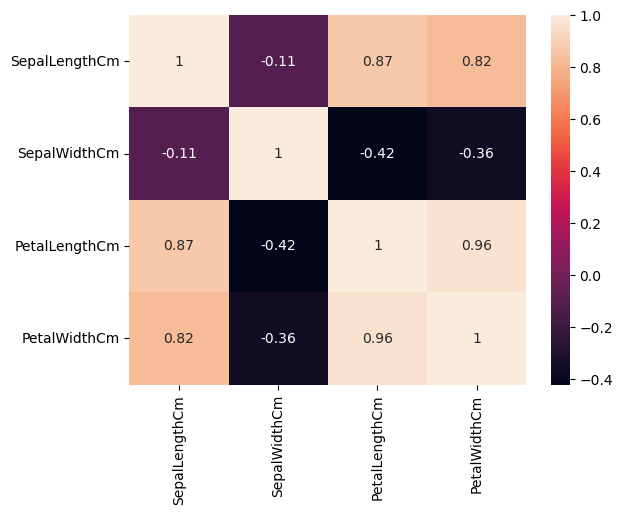

In [15]:
# Heat map
# Calculate the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

* SepalLengthCm and PetalLengthCm: These two features have a strong positive correlation of approximately 0.872. when SepalLengthCm is larger, PetalLengthCm tends to be larger too.


* There is a strong positive correlation of around 0.82 between SepalLengthCm and PetalWidthCm. This indicates that as the length of the sepal increases, the width of the petal tends to increase as well.


* SepalWidthCm and PetalLengthCm: These features show weak negative correlations with a coefficient of approximately -0.421. This suggests that as the width of the sepal increases, the length of the petal tends to decrease slightly.


* SepalWidthCm and PetalWidthCm: There is a weak negative correlation of about -0.36 between SepalWidthCm and PetalWidthCm. This implies that as the width of the sepal increases, the width of the petal tends to decrease slightly.


* PetalLengthCm and PetalWidthCm: These two features exhibit a very strong positive correlation with a coefficient of approximately 0.963. This indicates that as the length of the petal increases, the width of the petal tends to increase proportionally.     

From this heat map, we can say that execpt 'SepalWidthCm' all columns has positive correlation with each other.

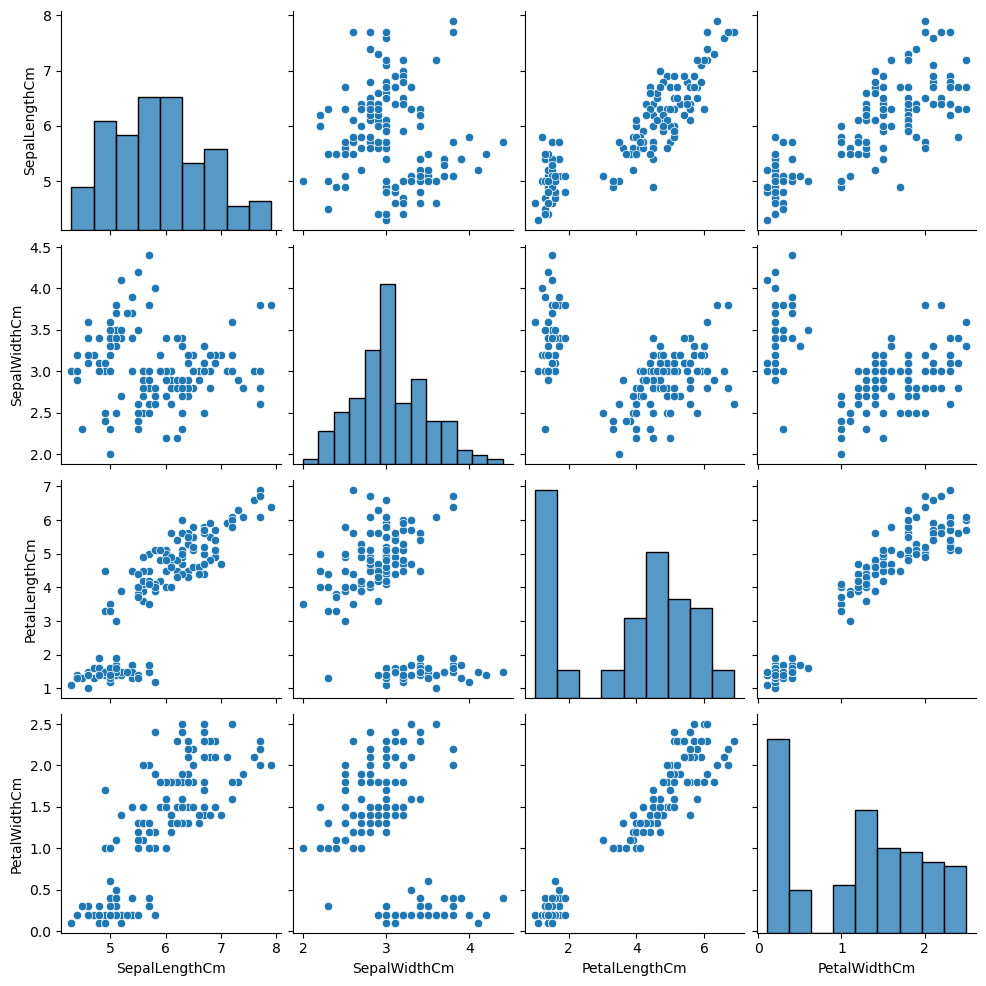

In [16]:
# PairPlot

sns.pairplot(df)

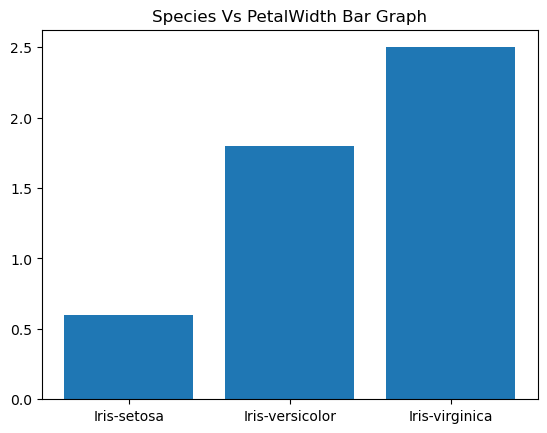

In [17]:
# Bar graph of Species Vs PedalWidth

plt.bar(df['Species'], df['PetalWidthCm'])
plt.title('Species Vs PetalWidth Bar Graph')
plt.show()

* A larger PetalWidthCm typically indicates that the flower belongs to the Virginica species, while a smaller PetalWidthCm is characteristic of the Setosa species.

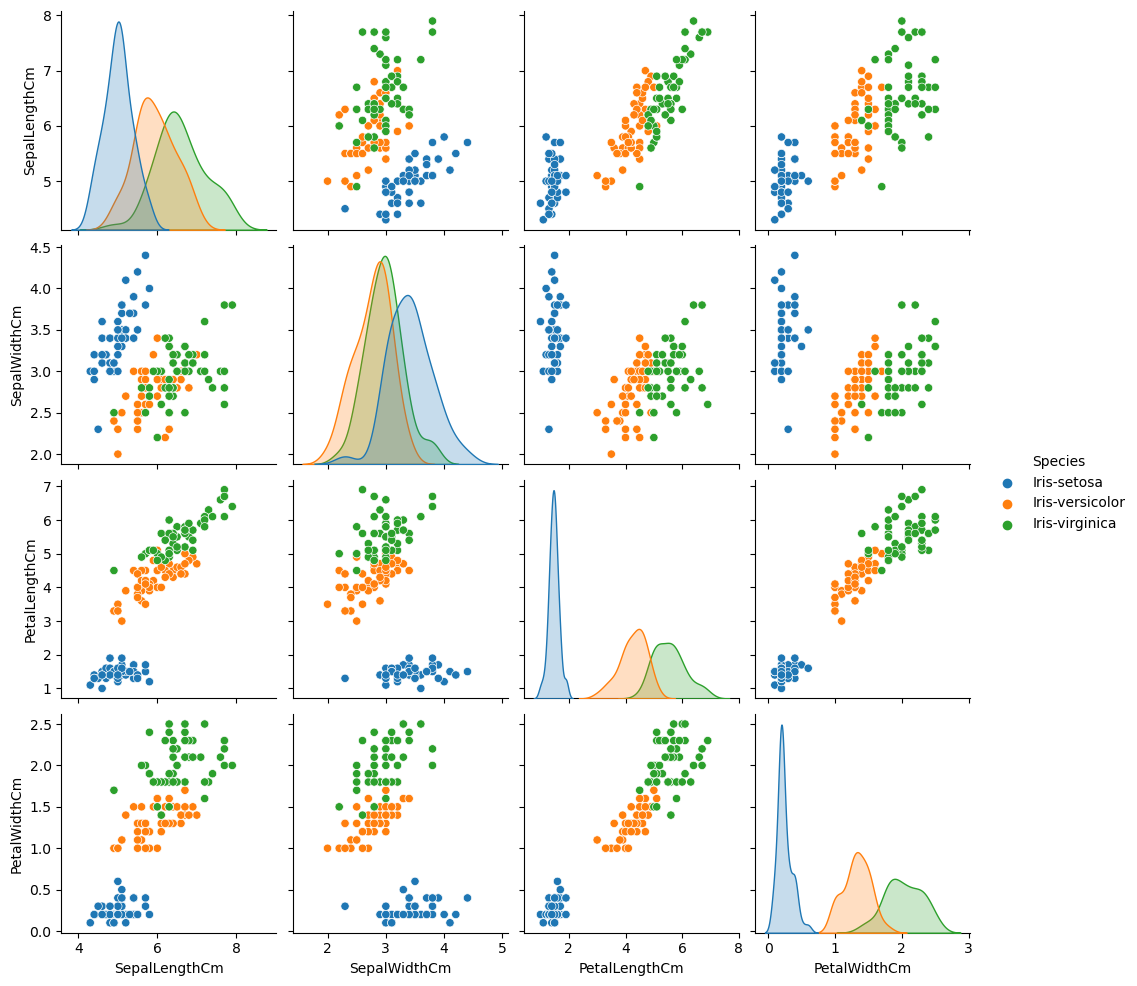

In [18]:
# Visualize the whole dataset
sns.pairplot(df, hue='Species')

* setosa is separated from the other two flowers.
* virginica is the longest flower and setosa is the shortest.

#### Lable Encoding to convert the non-numeric column into numeical form

### Classification model

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

* Iris-setosa        0
* Iris-versicolor    1
* Iris-virginica     2

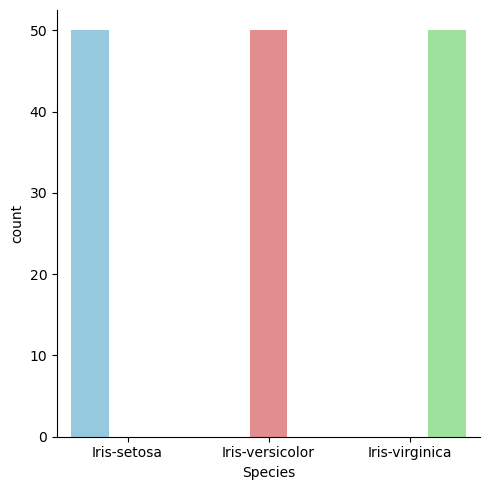

In [45]:
custom_palette = {'Iris-setosa': 'skyblue', 'Iris-versicolor': 'lightcoral', 'Iris-virginica': 'lightgreen'}

# Create the catplot with the custom palette
sns.catplot(x='Species', hue='Species', kind='count', data=df, palette=custom_palette)

In [6]:
# Model Training
X = df.drop('Species', axis=1)
y = df.Species

In [7]:
df['Species'].nunique()

3

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


### LogisticRegression

In [20]:
# Create a model classification
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

#Now predict the results using predict method.
y_pred=model.predict(X_test)

In [26]:
# results.
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [22]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.37


In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [40]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### Decision Tree

In [31]:
accuracy_scores = []

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict from the test dataset
predictions = dt.predict(X_test)

# Calculate the accuracy
accuracy_scores.append(accuracy_score(y_test, predictions))

### Randon Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict from the test dataset
predictions = rf.predict(X_test)

# Calculate the accuracy
accuracy_scores.append(accuracy_score(y_test, predictions))

### Accuracy Comparision

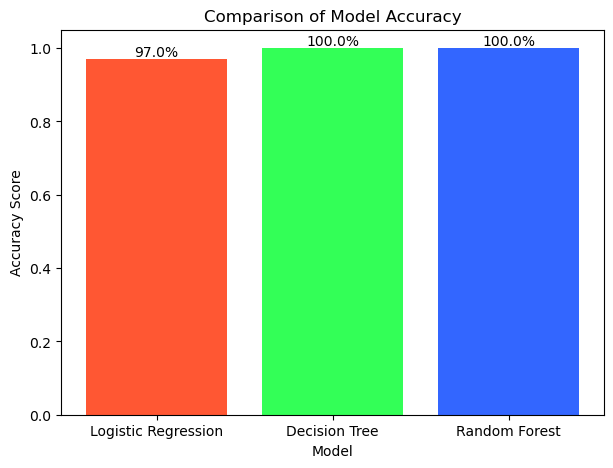

In [38]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Custom colors for the bars
bar_colors = ['#FF5733', '#33FF57', '#3366FF']

# Create a bar chart to compare model accuracy
plt.figure(figsize=(7, 5))
plt.bar(model_names, accuracy_scores, color=bar_colors)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy')

# Adding accuracy values on top of each bar
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{np.round(score*100, 2)}%', ha='center', va='bottom')

plt.show()
